In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sklearn import linear_model
from sklearn import metrics
# from sklearn.linear_model import LogisticRegression

In [30]:
db = pd.read_csv("water_potability.csv")
data = db.copy()
data.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [31]:

db = db.dropna()
data = db.copy()

y = data.Potability
X = db.drop(columns=['Potability'])  


X.shape, y.shape

((2011, 9), (2011,))

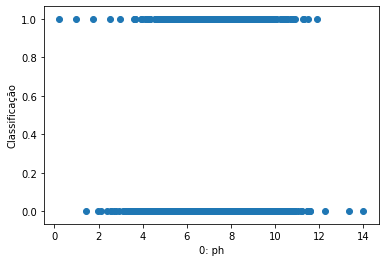

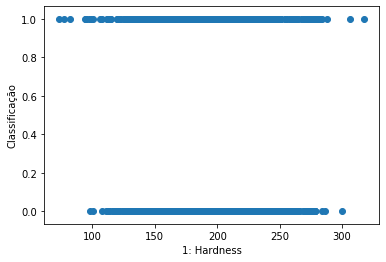

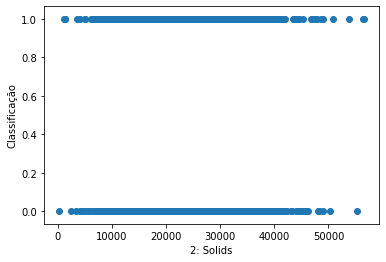

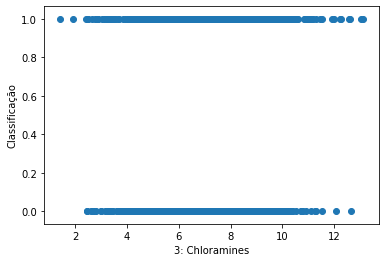

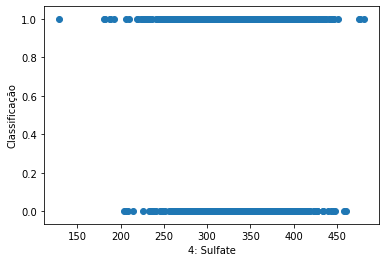

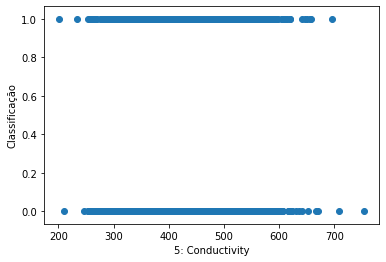

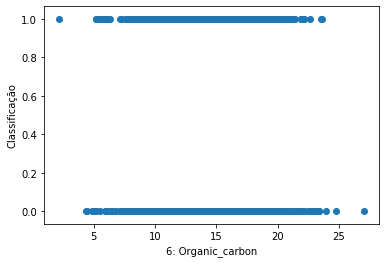

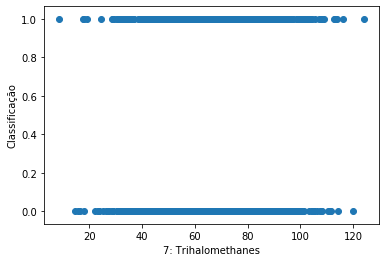

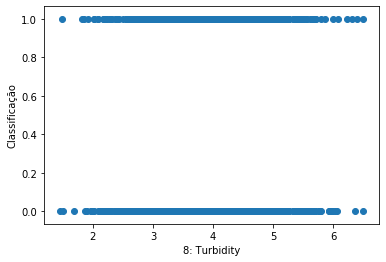

In [32]:
# o Y é o charge, para cada charge, ou seja para cada linha eu ploto o valor do charge e a coluna que estou visitando
# primeiro exemplo é para o valor X de charge qual é a idade correspondente (idade,charge)
for i in range(X.shape[1]):
    plt.xlabel(f"{i}: {X.columns[i]}")
    plt.ylabel("Classificação")
    plt.scatter(X.iloc[:,i], y)
    plt.show()

In [33]:
# X = data.iloc[:,0].values.reshape(-1,1)

# plt.figure(figsize=(10,10),dpi=80)

# plt.xlabel("ph")
# plt.ylabel("potavel")
# plt.scatter(X, y)
# plt.show()

X.shape, y.shape

((2011, 9), (2011,))

C:\Users\luizg\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


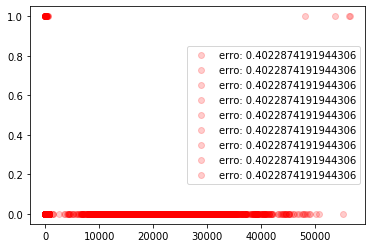

Coefficients: 
 [[ 1.21270326e-02 -5.19640743e-04  8.30922286e-06  1.40592481e-02
  -9.77200874e-04 -5.35288706e-04 -1.21279239e-02  5.77077699e-04
   8.36678353e-03]]
Mean squared error: 0.40
intercept_: [-0.00060852]
acuracia: 0.5977125808055693


In [34]:
# plt.xlabel("ph")
# plt.ylabel("potavel")
# plt.scatter(X, y)
modelo = linear_model.LogisticRegression(max_iter=1000,fit_intercept=True)
modelo.fit(X,y)
y_pred = modelo.predict(X)
erro = metrics.mean_squared_error(y, y_pred)
plt.plot(X, y_pred, 'ro', label=f"erro: {erro}", alpha=0.2)
plt.legend()
plt.show()


print("Coefficients: \n", modelo.coef_)
print("Mean squared error: %.2f" % metrics.mean_squared_error(y, y_pred))
print("intercept_:",modelo.intercept_)
print("acuracia:",metrics.accuracy_score(y,y_pred))


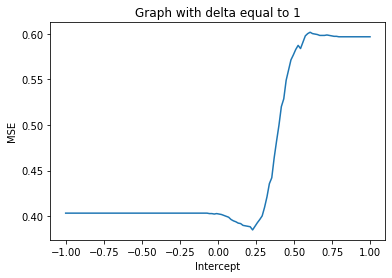

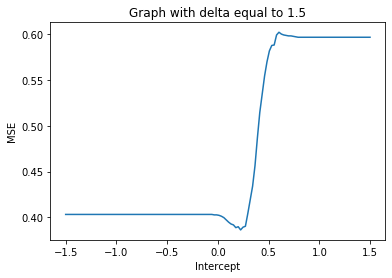

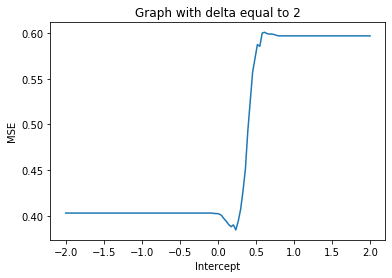

In [35]:
deltas = [1,1.5,2]
steps = 128
intercept = modelo.intercept_

variancia1_intercept = np.linspace(intercept-deltas[0], intercept+deltas[0], steps)
variancia2_intercept = np.linspace(intercept-deltas[1], intercept+deltas[1], steps)
variancia3_intercept = np.linspace(intercept-deltas[2], intercept+deltas[2], steps)
variancias_intercept = [variancia1_intercept,variancia2_intercept,variancia3_intercept]

# percorrer depois de X-8>x>X+8 (= intercept)
# substituindo o intercept pelo novo e calcular o RMSE apos o predict
# acumulando os rmse num array e depois plota eles

rmse_all = []
for variancia_intercept in variancias_intercept:
	actualRmse = []
	for w in variancia_intercept:
		modelo.intercept_ = w
		ypred = modelo.predict(X)
		mse = metrics.mean_squared_error(y, ypred)
		actualRmse.append(mse)
	
	actualRmse = np.array(actualRmse, dtype=float)
	rmse_all.append(actualRmse)
	

for i in range(len(rmse_all)):
	plt.title(f"Graph with delta equal to {deltas[i]}")
	plt.xlabel("Intercept")
	plt.ylabel("MSE")

	plt.plot(variancias_intercept[i], rmse_all[i])

	plt.show()
